## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
df = pd.read_csv('Country-data.csv',index_col=0)

In [4]:
# Check the shape
df.shape

(167, 9)

In [5]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [6]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
print(df.isnull().sum())

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

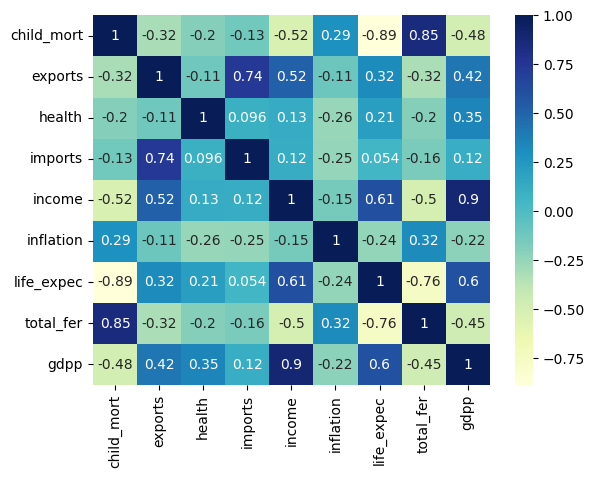

In [9]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
df_n = df.select_dtypes(include=[np.int64, np.float64])
corr = df_n.corr()

sns.heatmap(corr,annot=True,cmap='YlGnBu')

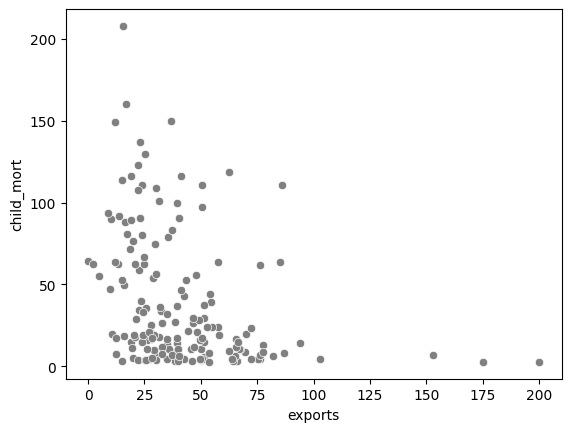

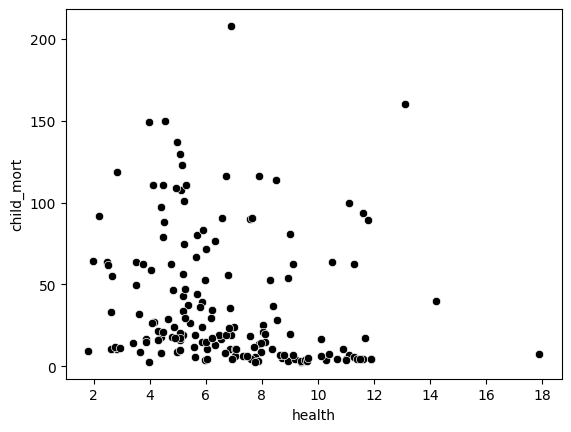

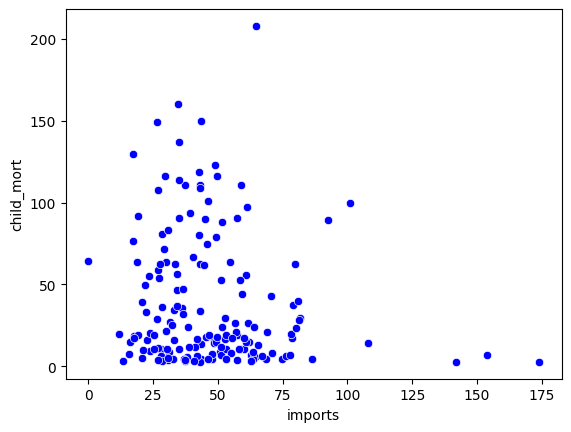

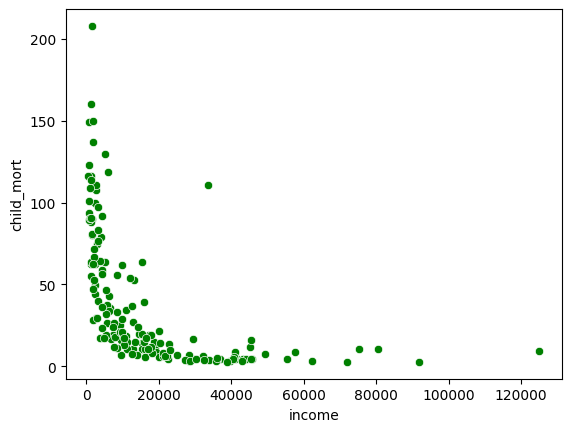

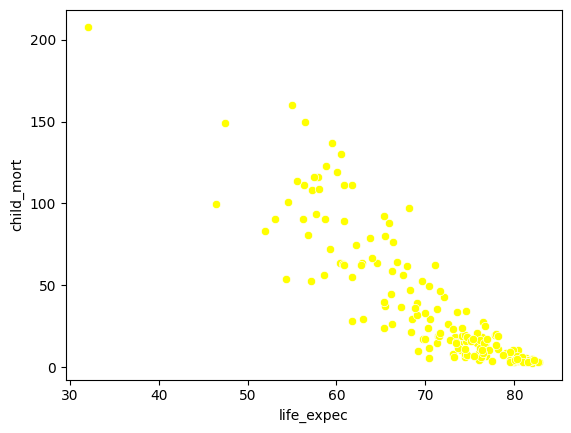

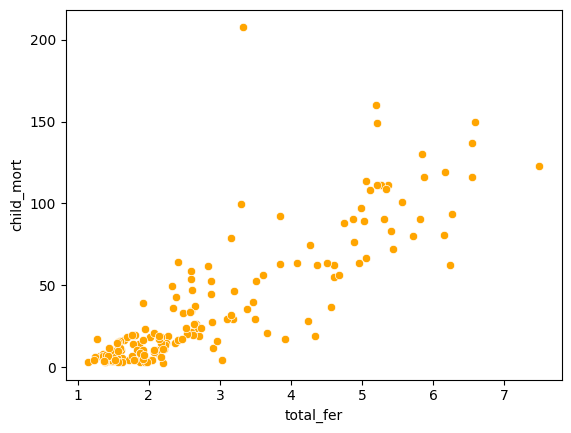

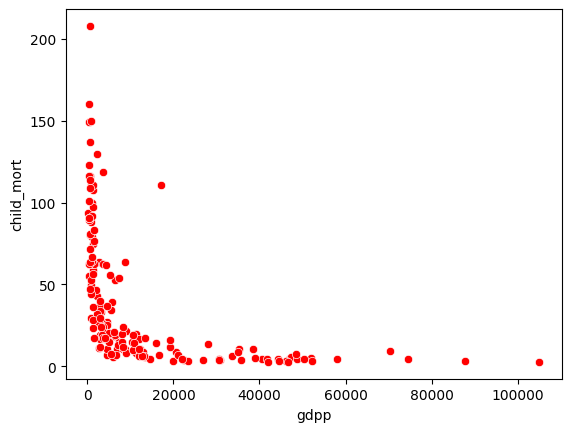

In [10]:
# Explore the continuous independent features against child_mort using scatter plots.
sns.scatterplot(x="exports", y="child_mort", data=df, color="grey")
plt.show()

sns.scatterplot(x="health", y="child_mort", data=df, color="black")
plt.show()

sns.scatterplot(x="imports", y="child_mort", data=df, color="blue")
plt.show()

sns.scatterplot(x="income", y="child_mort", data=df, color="green")
plt.show()

sns.scatterplot(x="life_expec", y="child_mort", data=df, color="yellow")
plt.show()

sns.scatterplot(x="total_fer", y="child_mort", data=df, color="orange")
plt.show()

sns.scatterplot(x="gdpp", y="child_mort", data=df, color="red")
plt.show()

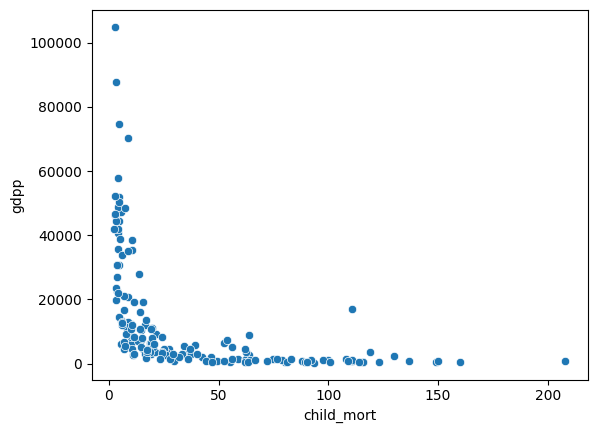

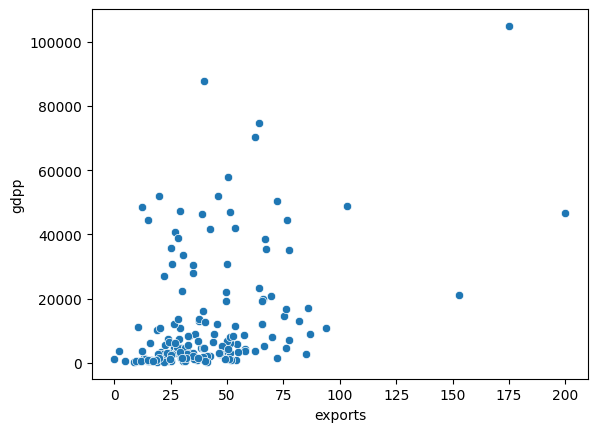

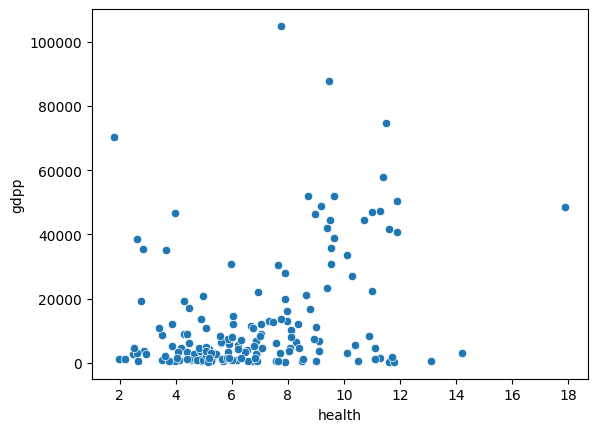

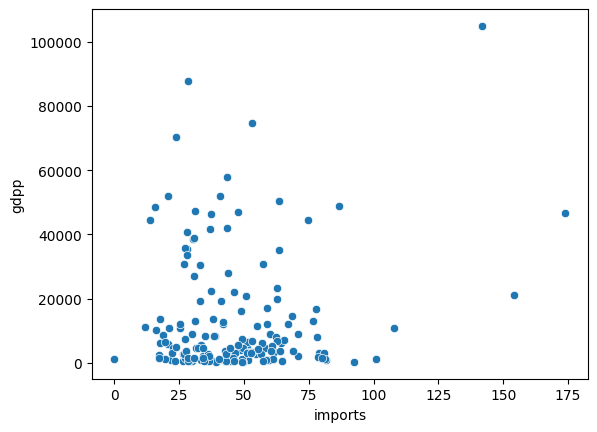

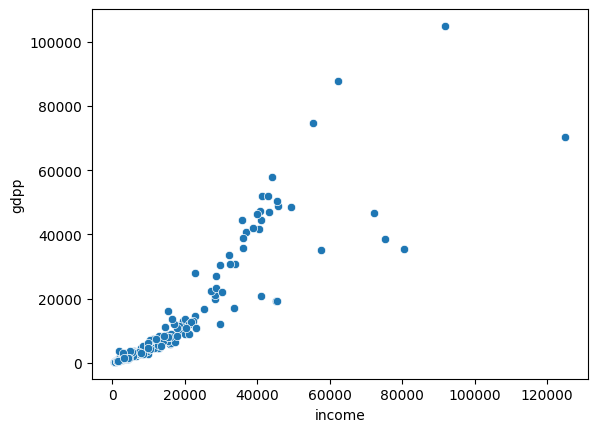

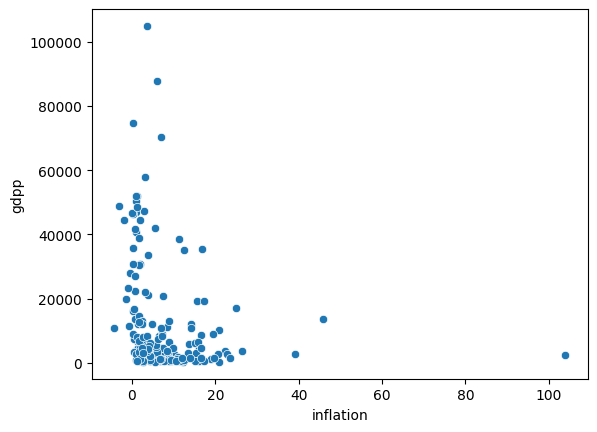

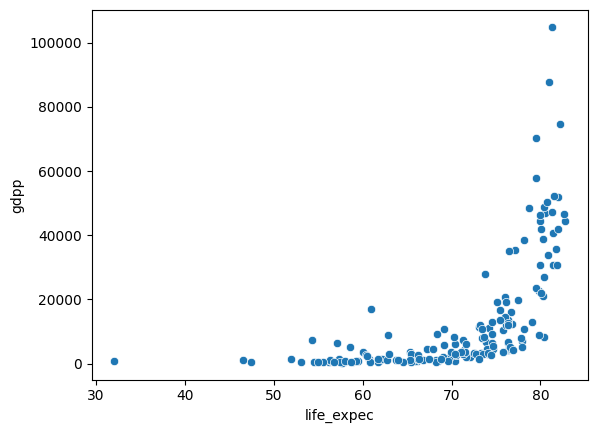

In [11]:
# Explore the continuous independent features against gdpp using scatter plots.
for i in df.columns[0:7]:
    i = sns.scatterplot(x=i, y='gdpp', data=df), 
    plt.show()


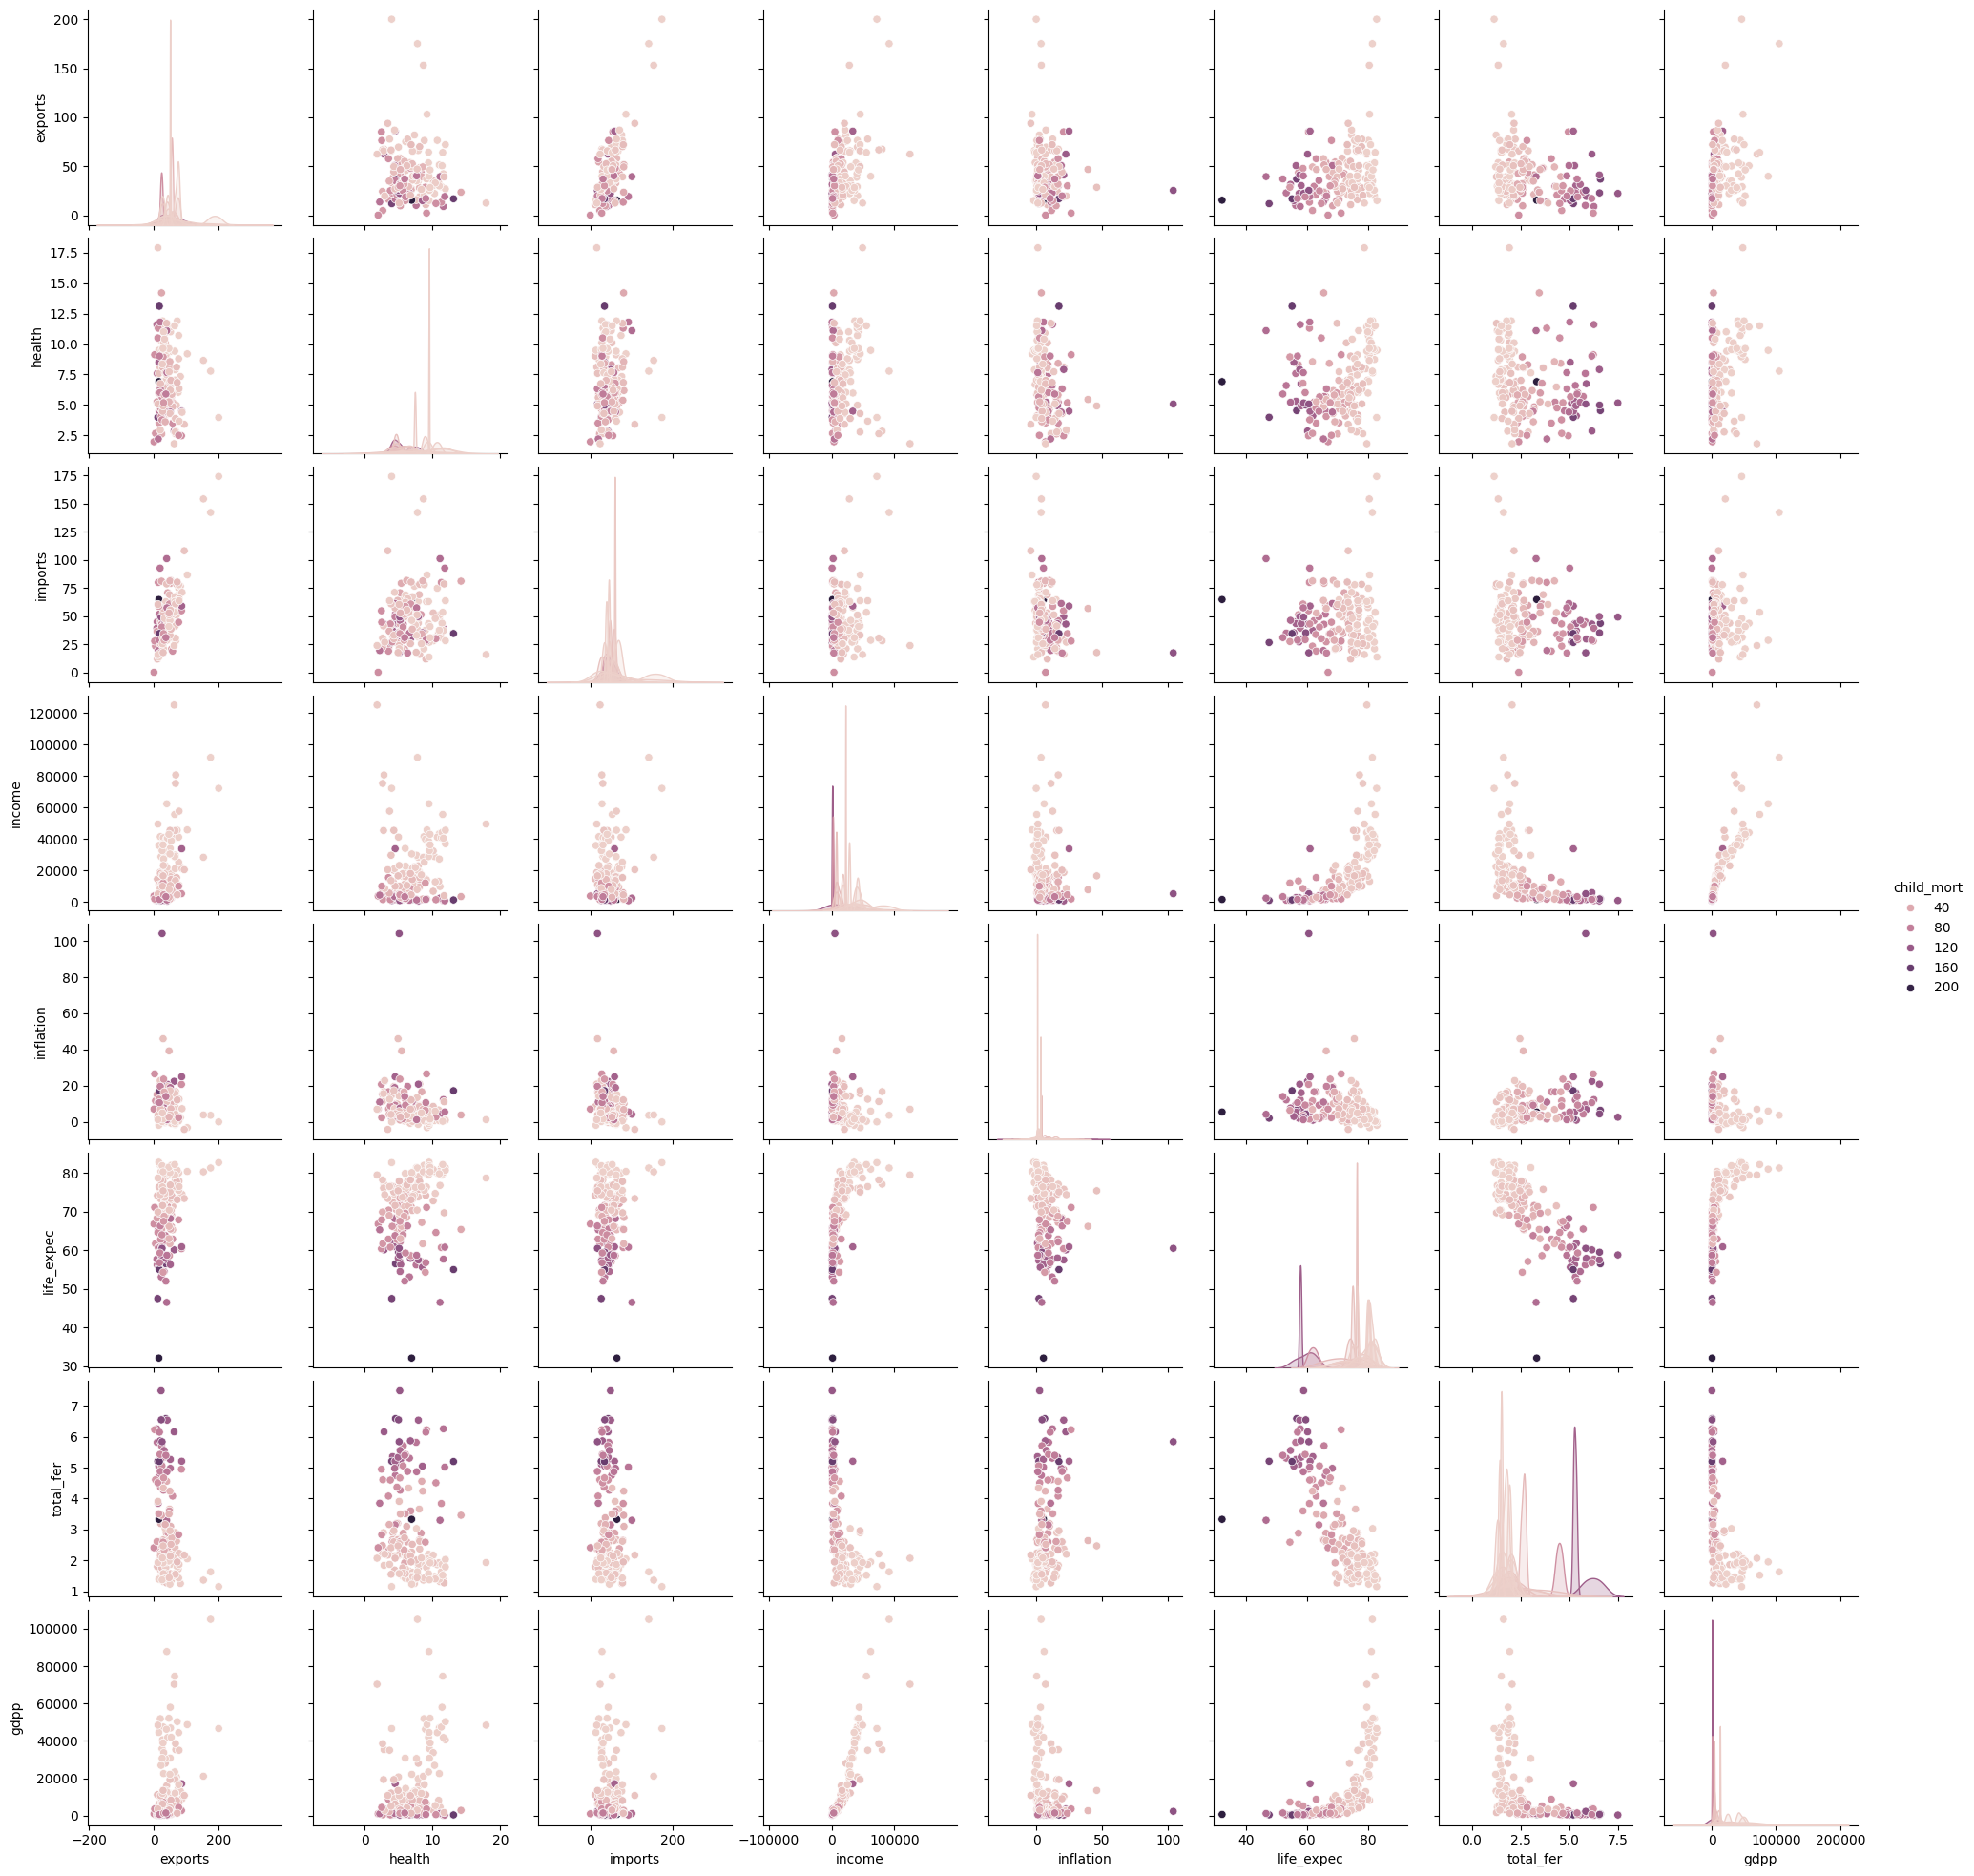

In [12]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(df,hue='child_mort')

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [13]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'child_mort', 'exports', 'health', 'imports', 'income', 'inflation',  'life_expec', 'total_fer', 'gdpp'])

# Check the dataframe
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

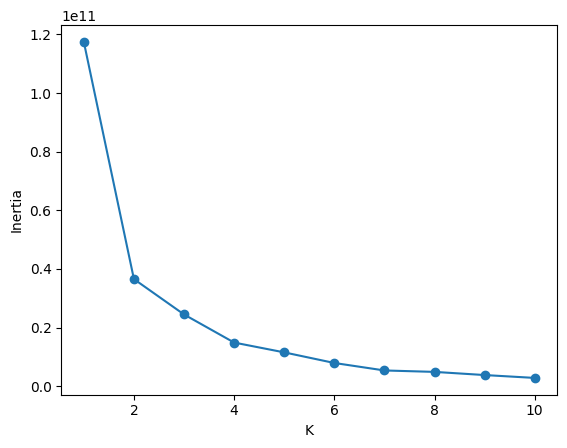

In [14]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset
elbow_Kmeans(df)

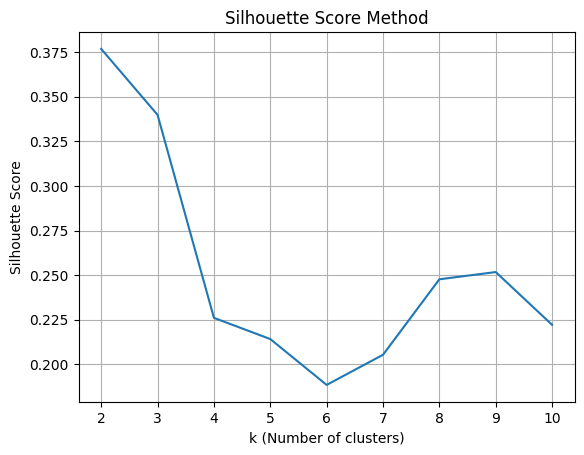

In [15]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k (Number of clusters)')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [16]:
# Remember to set the random_state to rseed
# Although the best choice of 'k' is 2, in line with the final task statement, I'll set it to 3.
k = 3
kmeans = KMeans(n_clusters=k, random_state=rseed)
kmeans.fit(df)
labels = kmeans.labels_

In [17]:
# Count the number of records in each cluster
df_scaled['Cluster records'] = kmeans.labels_
df_scaled['Cluster records'].value_counts()

Cluster records
0    109
2     36
1     22
Name: count, dtype: int64

In [18]:
# Display the average values for each of the features for each cluster
kmeans.cluster_centers_

array([[5.37440367e+01, 3.32513670e+01, 6.31477064e+00, 4.54767514e+01,
        6.48589908e+03, 9.15205505e+00, 6.66321101e+01, 3.50211009e+00,
        3.07499083e+03],
       [5.07727273e+00, 6.31681818e+01, 8.94272727e+00, 5.12590909e+01,
        5.48000000e+04, 3.30872727e+00, 8.04272727e+01, 1.80000000e+00,
        5.25545455e+04],
       [1.17027778e+01, 5.14194444e+01, 7.03250000e+00, 4.85000000e+01,
        2.64055556e+04, 6.36666667e+00, 7.64027778e+01, 1.97166667e+00,
        1.87122222e+04]])

In [19]:
# Display each cluster's features average values
df_scaled.groupby('Cluster records').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster records,,,,,,,,,
0,0.248997,0.165802,0.279973,0.261081,0.047245,0.123483,0.681107,0.370995,0.027145
1,0.012061,0.315468,0.443302,0.294325,0.435650,0.069483,0.953201,0.102524,0.499418
2,0.044317,0.256692,0.324580,0.278462,0.207383,0.097742,0.873822,0.129600,0.176400


In [20]:
# Name each cluster group
cluster_names = {
    0: 'Least Developed',
    1: 'Developed',
    2: 'Developing'
}

# Assign the names to the 'Cluster' column
df_scaled['Cluster records'] = df_scaled['Cluster records'].map(cluster_names)

In [21]:
# Check scaled dataframe columns list
df_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'Cluster records'],
      dtype='object')

In [22]:
# Display the dataframe
df.head(80)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
Jamaica,18.1,31.3,4.81,49.6,8000,9.810,74.7,2.17,4680
Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500


Silhouette score: 0.600


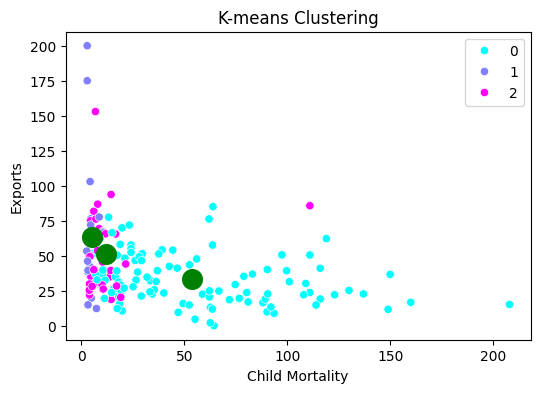

In [23]:
# Verify the model performance with silhouette coefficient
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

# Step 6: Visualization and Interpretation
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=labels, palette='cool')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, linewidths=1, color='g')
plt.xlabel('Child Mortality')
plt.ylabel('Exports')
plt.title('K-means Clustering')
plt.show()

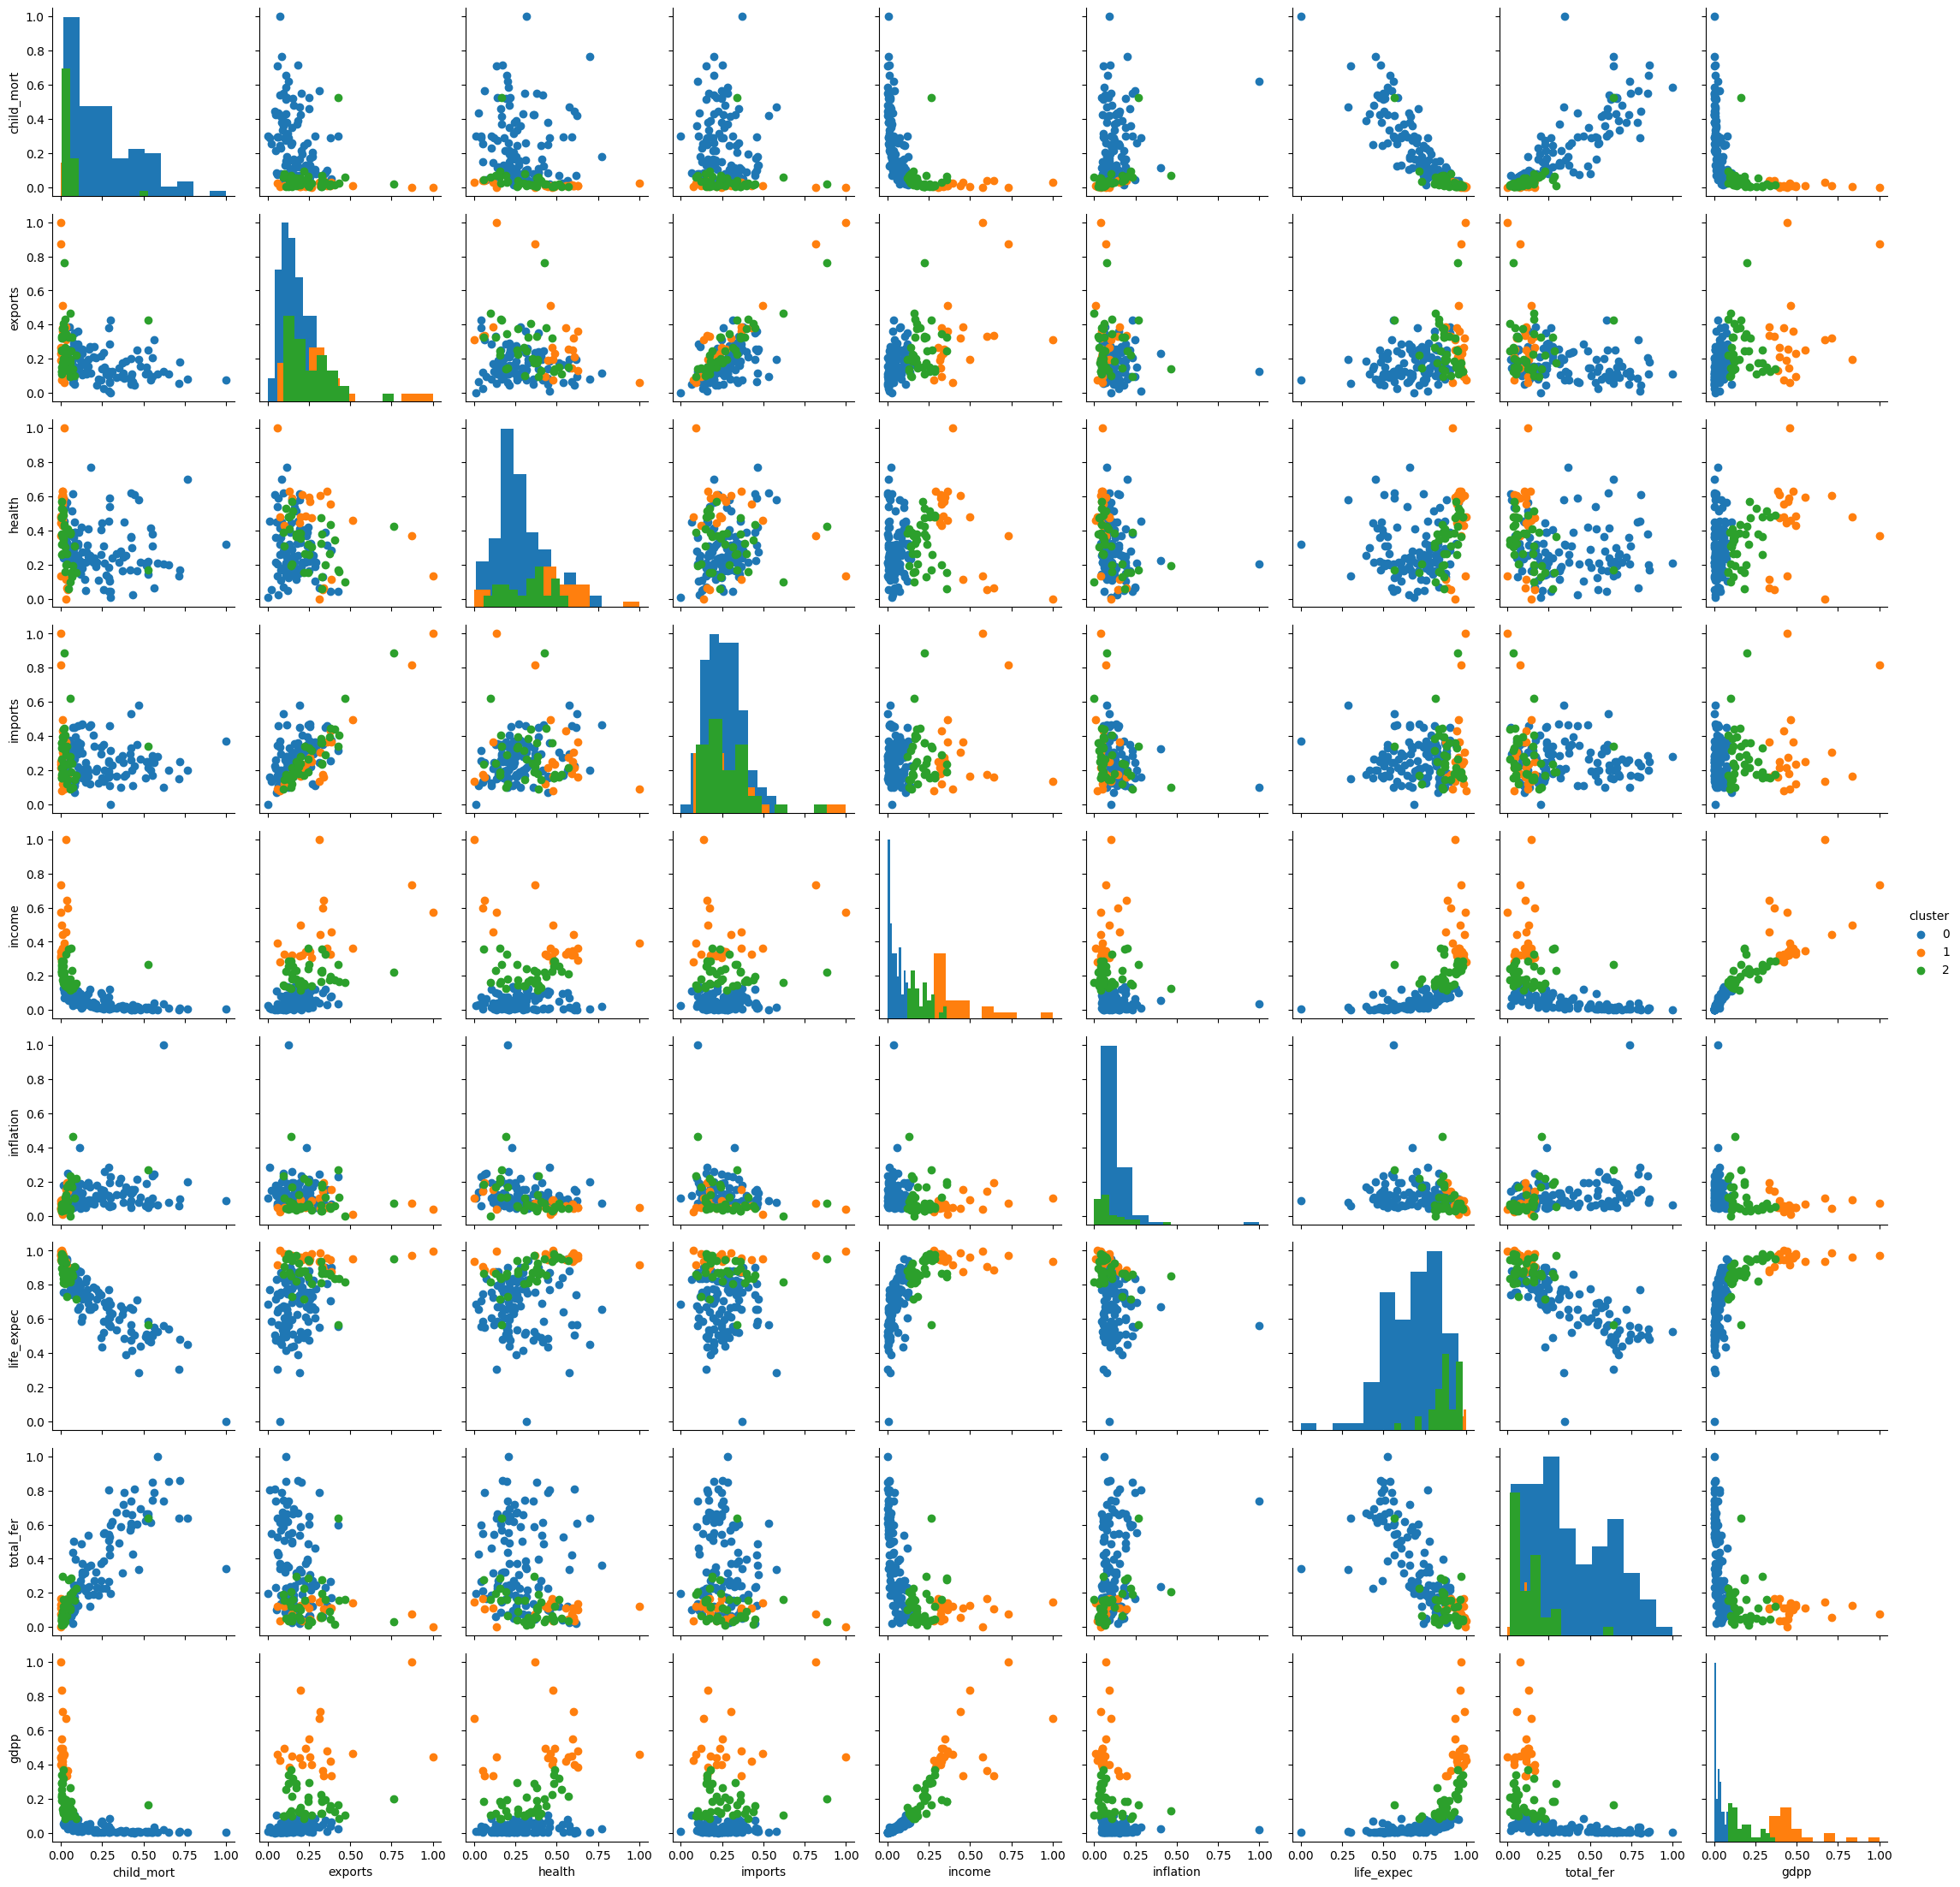

In [24]:
# Create a copy of the DataFrame with the cluster labels
df_clusters = df_scaled.copy()
df_clusters['cluster'] = labels

# Pairplot with cluster labels
grid_cluster = sns.PairGrid(df_clusters, hue='cluster', diag_sharey=False)
grid_cluster.map_diag(plt.hist)
grid_cluster.map_offdiag(plt.scatter)
grid_cluster.add_legend()
plt.show()

## Predictions

In [25]:
# Add the predicted cluster label column to the original dataframe
df['Cluster records'] = kmeans.labels_

# Display the dataframe
df.head(80)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster records
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,2
Jamaica,18.1,31.3,4.81,49.6,8000,9.810,74.7,2.17,4680,0
Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,1


## Visualisation of clusters

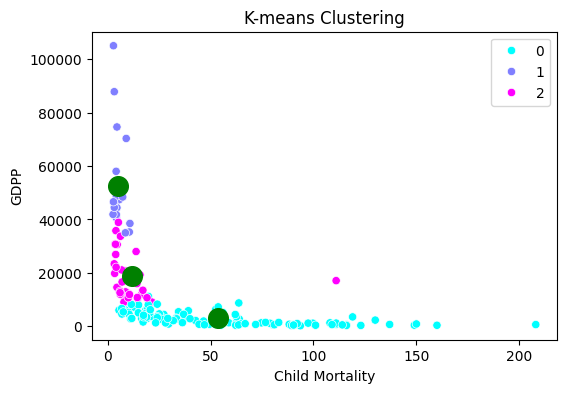

In [26]:
# Visualisation of clusters: child mortality vs gdpp
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 8], hue=labels, palette='cool')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 8], marker='o', s=200, linewidths=1, color='g')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.title('K-means Clustering')
plt.show()

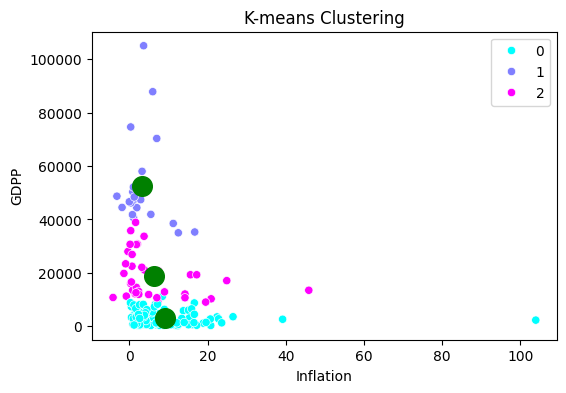

In [27]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df.iloc[:, 5], y=df.iloc[:, 8], hue=labels, palette='cool')
plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 8], marker='o', s=200, linewidths=1, color='g')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.title('K-means Clustering')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:** 
By analyzing the scatterplots based on child mortality, GDPP and inflation, we can deduce that less developed countries tend, in general, to have higher inflation rates, while at the same time having lower GDPP numbers. Furthermore, we can understand that GDP seems to be an extremely relevant factor when analyzed in relation to child mortality, with almost all cases of very high child mortality belonging to this group.
When analyzing the GDPP levels of developed and developing groups in relation to inflation, it is possible to see, although not always clear or linear, that there is a tendency for inflation to reduce as GDPP values increase.
Similarly, when looking at the scatterplot measuring GDPP against the child mortality rate, we see a slightly more linear trend of fewer cases as values ​​increase, albeit much less pronounced.
Conclusively, we were able to observe a correlation between higher inflation and lower GDPP values in all groups. Furthermore, we can distinguish a disproportionate amount of child mortality cases in countries with low GDPP, while in the other two groups the trend is still visible, however on a much smaller scale.